In [ ]:
!pip install tensorflow_model_optimization


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow_model_optimization.sparsity import keras as sparsity

In [ ]:
import os
for dirname, _, filenames in os.walk('C:/Users/saksh/PycharmProjects/FreshPrice/FreshPrice/Data/Image_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


uint8
(449, 303, 3)


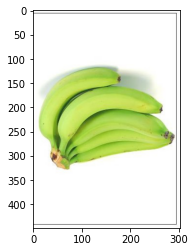

In [ ]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread('/content/drive/MyDrive/Freshprice/Image_data/unriped_bananas/575fbed67d.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

(387, 620, 3)
(628, 1200, 3)
(194, 259, 3)
(183, 275, 3)
(210, 240, 3)


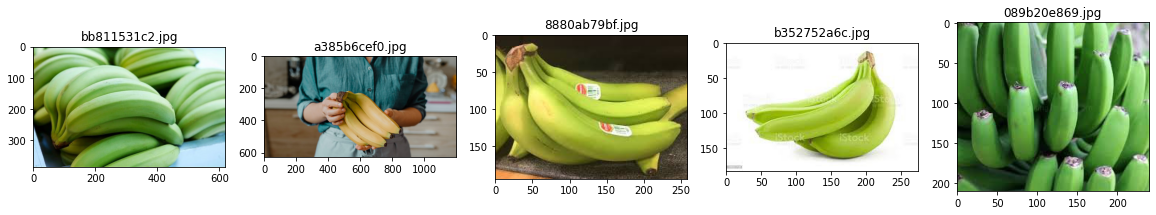

In [ ]:
plt.figure(figsize=(20,20))
unriped_folder=r'/content/drive/MyDrive/Freshprice/Image_data/unriped_bananas/'
for i in range(5):
    file = random.choice(os.listdir(unriped_folder))
    image_path= os.path.join(unriped_folder, file)
    img=mpimg.imread(image_path)
    print(img.shape)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
print("the total # of under riped bananas are:", len(os.listdir(unriped_folder)))

the total # of under riped bananas are: 71


(275, 183, 3)
(781, 1200, 3)
(183, 137, 3)
(1200, 800, 3)
(275, 183, 3)


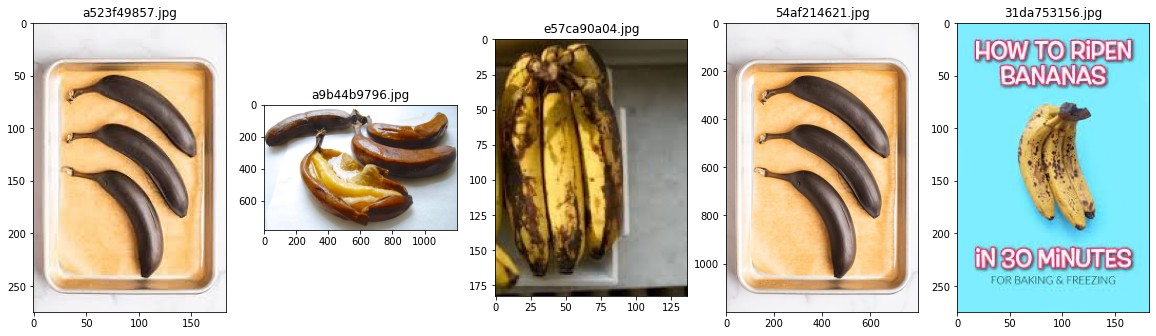

In [ ]:
plt.figure(figsize=(20,20))
over_riped_folder=r'/content/drive/MyDrive/Freshprice/Image_data/over_riped_bananas/'
for i in range(5):
    file = random.choice(os.listdir(over_riped_folder))
    image_path= os.path.join(over_riped_folder, file)
    img=mpimg.imread(image_path)
    print(img.shape)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
print("the total # of over riped bananas are:", len(os.listdir(over_riped_folder)))

the total # of over riped bananas are: 62


In [ ]:
# #script to break down images to test and train
# #split images into training and test folders
# import os
# import numpy as np
# import shutil
# import random
# root_dir = '/content/drive/MyDrive/Freshprice/Image_data'
# classes_dir = os.listdir(root_dir)

# test_ratio = 0.20

# for cls in classes_dir:
#     if not os.path.exists(root_dir +'/train/' + cls):
#         os.makedirs(root_dir +'/train/' + cls)
#         os.makedirs(root_dir +'/test/' + cls)
#     else:
#         shutil.rmtree(root_dir +'/train/' + cls)           # Removes all the subdirectories!
#         os.makedirs(root_dir +'/train/' + cls,exist_ok=True)
#         os.makedirs(root_dir +'/test/' + cls,exist_ok=True)

#     src = root_dir +"/"+ cls
#     print("data being copied from: ",src)

#     allFileNames = os.listdir(src)
#     np.random.shuffle(allFileNames)
#     train_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                               [int(len(allFileNames)* (1 - test_ratio))])


#     train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
#     test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

#     print("*****************************")
#     print('Total images for %s: %d' % (cls, len(allFileNames)))
#     print('Training images for %s: %d ' %(cls,len(train_FileNames)))
#     print('Testing images for %s: %d'% (cls,len(test_FileNames)))
#     print("*****************************")

#     for name in train_FileNames:
#         shutil.copy(name, root_dir +'/train/' + cls)

#     for name in test_FileNames:
#         shutil.copy(name, root_dir +'/test/' + cls)
# print("Copying Done!")

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder='/content/drive/MyDrive/Freshprice/Image_data/train'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
    
    for dir1 in os.listdir(img_folder):
        print("Collecting images for: ",dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            try:
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            except:
                break
            image=np.array(image)
            image = image.astype('float64')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [ ]:
img_data=np.array(img_data)
class_name=np.array(class_name)
img_data.shape

(83, 200, 200, 3)

In [ ]:
def product_mapping(a):
    if a=="over_riped_bananas":
        return 1
    else:return 0
class_name=list(map(product_mapping,class_name))
class_name=np.array(class_name)

In [ ]:
input_shape=img_data.shape[1:]
input_shape

(200, 200, 3)

In [ ]:
pruning_params = {
'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.85,
final_sparsity=0.95,
begin_step=2000,
end_step=5000,frequency=10)}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# pruned_model=keras.models.Sequential
# ([
# sparsity.prune_low_magnitude(keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=input_shape,activation='relu'),**pruning_params),
# keras.layers.MaxPooling2D(pool_size=(2, 2)),
# sparsity.prune_low_magnitude(keras.layers.Conv2D(128, kernel_size=(2,2), activation='relu'),**pruning_params),
# sparsity.prune_low_magnitude(keras.layers.Conv2D(128, kernel_size=(2,2), activation='relu'),**pruning_params),
# keras.layers.Flatten(),
# sparsity.prune_low_magnitude(keras.layers.Dense(256,activation='relu'),**pruning_params),
# keras.layers.Dropout(0.2),
# keras.layers.Dense(1,activation='sigmoid')
# ])

def model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    model=Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 #   model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
 #   model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [ ]:
pruned_model=model()
pruned_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# pruned_fit=pruned_model.fit(x=img_data,y=class_name, epochs=10)

In [ ]:
# import tempfile
# _, keras_file = tempfile.mkstemp('.h5')
# tf.keras.models.save_model(pruned_model, keras_file, include_optimizer=False)
# print('Saved baseline model to:', keras_file)

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=10)
}

model_for_pruning = prune_low_magnitude(pruned_model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_for_pruning.summary()
#model_for_pruning.fit(x=img_data,y=class_name, epochs=10)


/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 198, 198, 28)     1542      
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_conv2d_  (None, 196, 196, 64)     32322     
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_max_poo  (None, 98, 98, 64)       1         
 ling2d (PruneLowMagnitude)                                      
                                                                 
 prune_low_magnitude_flatten  (None, 614656)           1         
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense (  (None, 64)               7

In [ ]:
import tempfile
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(x=img_data,y=class_name, epochs=10,
                  callbacks=callbacks)



Epoch 1/10
3/3 [==============================] - 8s 835ms/step - loss: 47.2460 - accuracy: 0.4337
Epoch 2/10
3/3 [==============================] - 1s 233ms/step - loss: 6.6240 - accuracy: 0.4699
Epoch 3/10
3/3 [==============================] - 1s 230ms/step - loss: 1.0779 - accuracy: 0.5301
Epoch 4/10
3/3 [==============================] - 1s 232ms/step - loss: 0.8632 - accuracy: 0.4940
Epoch 5/10
3/3 [==============================] - 1s 236ms/step - loss: 0.7518 - accuracy: 0.6627
Epoch 6/10
3/3 [==============================] - 1s 237ms/step - loss: 0.6643 - accuracy: 0.6145
Epoch 7/10
3/3 [==============================] - 1s 233ms/step - loss: 0.5815 - accuracy: 0.7229
Epoch 8/10
3/3 [==============================] - 1s 233ms/step - loss: 0.5610 - accuracy: 0.6867
Epoch 9/10
3/3 [==============================] - 1s 232ms/step - loss: 0.4523 - accuracy: 0.8554
Epoch 10/10
3/3 [==============================] - 1s 232ms/step - loss: 0.3513 - accuracy: 0.8916


In [ ]:
# over_riped_folder=r'/content/drive/MyDrive/Freshprice/Image_data/over_riped_bananas/'
tf.keras.models.save_model(model_for_pruning, '/content/drive/MyDrive/Freshprice/pruned_model_16bits.h5', include_optimizer=False)
print('Saved pruned model')

Saved pruned model


In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder='/content/drive/MyDrive/Freshprice/Image_data/test/'


# extract the image array and class name
img_data_test, class_name_test =create_dataset('/content/drive/MyDrive/Freshprice/Image_data/test/')

In [ ]:
img_data_test=np.array(img_data_test)
class_name_test=list(map(product_mapping,class_name_test))
class_name_test=np.array(class_name_test)

In [ ]:
preds=model_for_pruning.predict(img_data_test).round().astype(int)

In [ ]:
flat_pred = [item for sublist in preds for item in sublist]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(class_name_test, flat_pred)
print("The Accuracy is: %2f" % accuracy)

The Accuracy is: 0.785714
